<a href="https://colab.research.google.com/github/TORRENTIALBUG/MAT494HW/blob/main/4_2_MAT494.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Spectral Graph Bipartitioning

{(0, 1): Text(-0.37685955629363743, -0.5278983134894805, '0'),
 (0, 6): Text(0.29889551294804884, -0.13519601217409555, '1'),
 (1, 2): Text(0.0037631422371081635, -0.35470316346629854, '2'),
 (1, 4): Text(-0.8031325224404366, 0.31041064925366124, '3'),
 (1, 5): Text(-0.4758549611161602, 0.39516538428192105, '4'),
 (6, 7): Text(0.7745412400907311, 0.43985115071544256, '11'),
 (2, 3): Text(0.07887814145759275, -0.6754902094275341, '5'),
 (2, 6): Text(0.6795182114787944, 0.03799913784908637, '6'),
 (2, 5): Text(0.33033583942285827, 0.09842355948161224, '7'),
 (4, 5): Text(-0.47655982525468654, 0.763537372201572, '9'),
 (5, 7): Text(0.42535886803479495, 0.5002755723479684, '10'),
 (3, 5): Text(-0.4007399618956756, 0.07437833832068552, '8')}

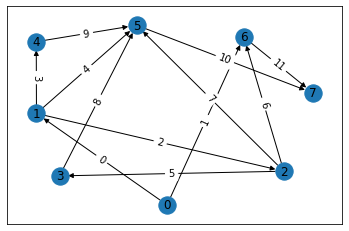

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

M = [[0, 1], [0, 6], [1, 2], [1, 4], [1, 5], [2, 3], [2, 6], [2, 5], [3, 5], [4, 5], [5, 7], [6, 7]]
for i, v in enumerate(M):
    v.append(i)
# Edges of a random graph

G = nx.DiGraph()
G.add_weighted_edges_from(M)

pos = nx.spring_layout(G, k=15) 
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [2]:
cut_value, partition = nx.minimum_cut(G, 0, 7, capacity='weight')
reachable, non_reachable = partition

cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))

[(0, 1), (0, 6)]
